<a href="https://colab.research.google.com/github/GUNWOOOH/ADP_Practice/blob/main/%EA%B8%B0%EC%B6%9C%EB%B3%B5%EC%9B%90/%EA%B8%B0%EC%B6%9C%EB%B3%B5%EC%9B%90_ADP24_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ADP 24회 기출복원

출처: https://lovelydiary.tistory.com/381

# 1. 머신러닝

 (data: 학생 결석일수 관련 데이터, 독립변수 12개 - 성별, 나이, 부모와 같이 사는지 여부, 아버지 학력, 어머니 학력, 보호자, 집학교 거리, 공부 시간, F학점 맞은 횟수, 가족 관계, 여가시간, 총 395개의 관측치) -50점

1-1. 시각화 포함하여 탐색적 분석하기
  - 1-1.1 시각화 포함하여 전처리 하기


  - 1-1.2 이밖에 추가할 수 있는 전처리를 하고, 그 이유와 기대효과를 쓰기

    -> health data 통합 / Medu, Fedu 합치기 / 너무 많은 factor 변수 제거 / na 많은 변수 제거 / scaling 등


In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


df = pd.read_csv("https://raw.githubusercontent.com/mohammedAljadd/students-performance-prediction/main/student-data.csv")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [25]:
df.isnull().sum()

school               0
sex                  0
age                  0
address              0
famsize              0
Pstatus              0
Medu                 0
Fedu                 0
Mjob                 0
Fjob                 0
reason               0
guardian             0
traveltime           0
studytime            0
failures             0
schoolsup            0
famsup               0
paid                 0
activities           0
nursery              0
higher               0
internet             0
romantic             0
famrel               0
freetime             0
goout                0
Dalc                 0
Walc                 0
health               0
absences             0
passed               0
Overall Health       0
Time Productivity    0
dtype: int64

In [23]:
# 고유값의 수
all_columns = df.columns.tolist()
num_columns = df._get_numeric_data().columns.tolist()
cat_columns = list(set(all_columns) - set(num_columns))

df[cat_columns].nunique()

activities    2
Pstatus       2
address       2
Fjob          5
sex           2
internet      2
nursery       2
Mjob          5
famsize       2
guardian      3
schoolsup     2
famsup        2
romantic      2
school        2
reason        4
paid          2
passed        2
higher        2
dtype: int64

<Axes: xlabel='address', ylabel='absences'>

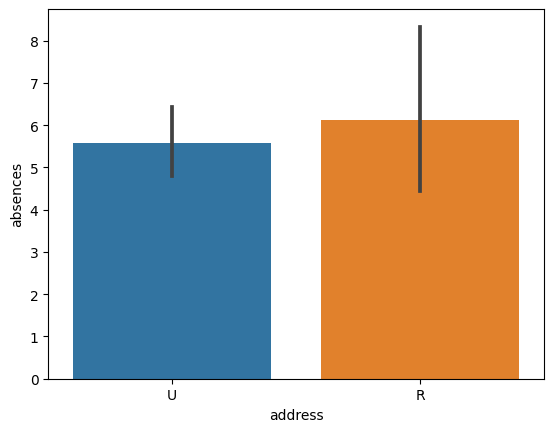

In [28]:
sns.barplot(x='address', y='absences', data=df)

In [5]:
df['Overall Health'] = (0.5 * df['Dalc'] + 0.5 * df['Walc'] + 2 * df['health'] + df['famrel']) / 4

<Axes: xlabel='Overall Health', ylabel='absences'>

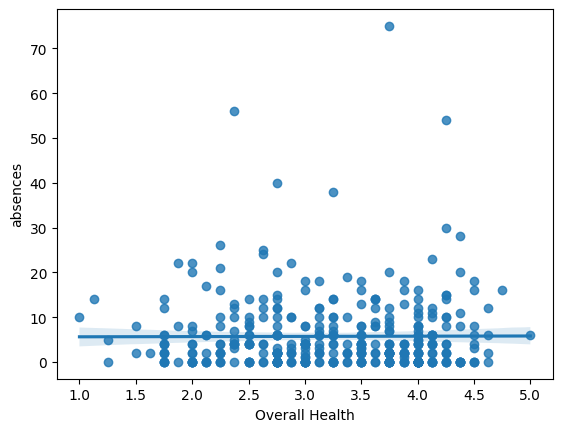

In [7]:
sns.regplot(x='Overall Health', y='absences', data=df)

[Text(0.5, 0, 'Family Size'),
 Text(0, 0.5, 'Family Relationship'),
 Text(0.5, 1.0, 'Fam. Size vs. Fam. Rel.')]

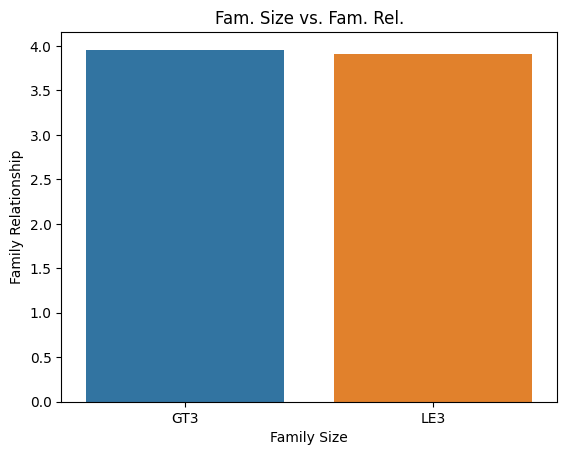

In [8]:
size_rel = df.groupby("famsize").aggregate({"famrel": "mean"})
size_rel.reset_index(inplace=True)

sns.barplot(x='famsize', y='famrel', data=size_rel).set(xlabel='Family Size', ylabel='Family Relationship', title='Fam. Size vs. Fam. Rel.')

<Axes: xlabel='age', ylabel='Count'>

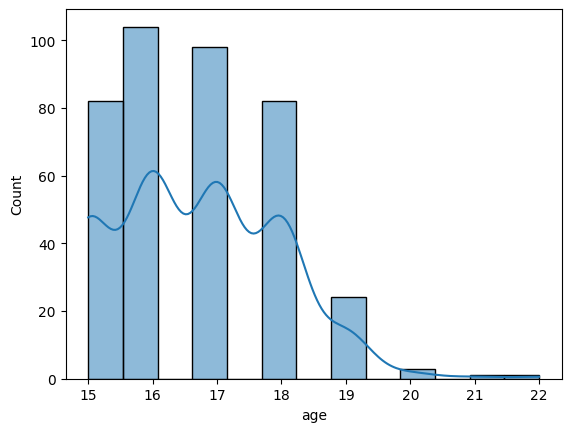

In [9]:
# Visualize distribution of `age`
sns.histplot(x='age', data=df, kde=True)

In [10]:
age_grade = df.groupby("age").aggregate({'absences': 'mean'})
age_grade.reset_index(inplace=True)
age_grade

,age,absences
0,15,3.341463
1,16,5.451923
2,17,6.459184
3,18,6.048780
4,19,10.458333
5,20,5.000000
6,21,3.000000
7,22,16.000000


[Text(0.5, 0, 'Job'),
 Text(0, 0.5, 'Education Lvl.'),
 Text(0.5, 1.0, 'Job vs. Edu. Lvl. (Mother)')]

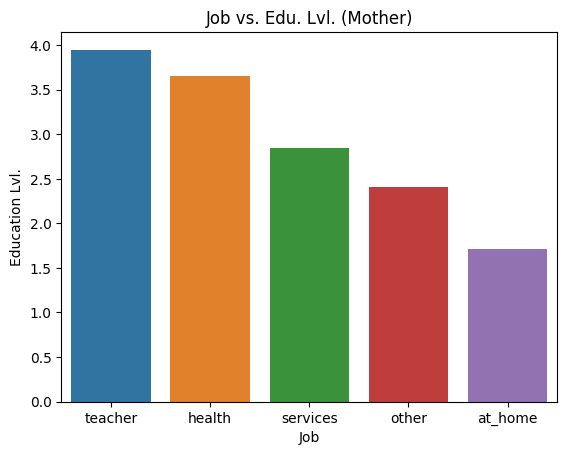

In [12]:
mjob_edu = df.groupby("Mjob").aggregate({"Medu": "mean"})
mjob_edu.reset_index(inplace=True)
mjob_edu.sort_values(by='Medu', ascending=False, inplace=True)
sns.barplot(x='Mjob', y='Medu', data=mjob_edu).set(xlabel='Job', ylabel='Education Lvl.', title='Job vs. Edu. Lvl. (Mother)')

[Text(0.5, 0, 'Job'),
 Text(0, 0.5, 'Education Lvl.'),
 Text(0.5, 1.0, 'Job vs. Edu. Lvl. (Father)')]

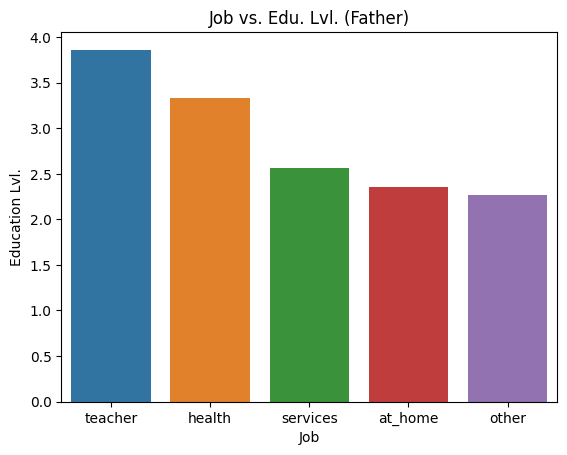

In [13]:
fjob_edu = df.groupby("Fjob").aggregate({"Fedu": "mean"})
fjob_edu.reset_index(inplace=True)
fjob_edu.sort_values(by='Fedu', ascending=False, inplace=True)
sns.barplot(x='Fjob', y='Fedu', data=fjob_edu).set(xlabel='Job', ylabel='Education Lvl.', title='Job vs. Edu. Lvl. (Father)')

<Axes: xlabel='Time Productivity', ylabel='absences'>

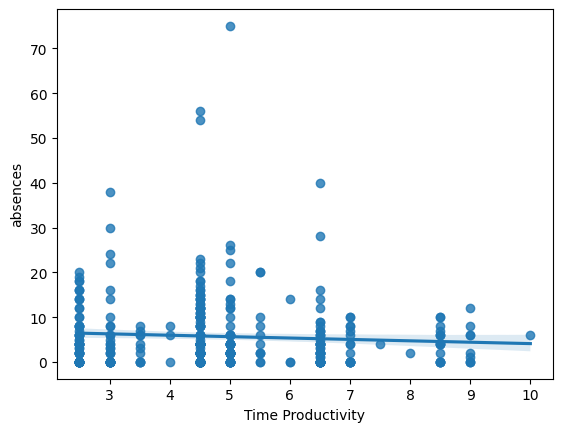

In [14]:
df['Time Productivity'] = 0.5 * df['traveltime'] + 2 * df['studytime']
sns.regplot(x='Time Productivity', y='absences', data=df)

<Axes: xlabel='studytime', ylabel='absences'>

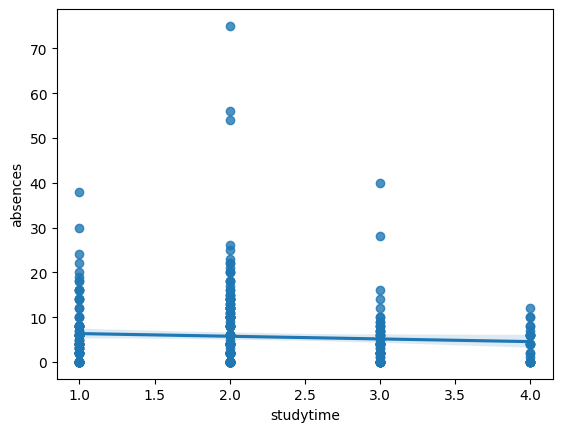

In [15]:
sns.regplot(x='studytime', y='absences', data=df)

[Text(0.5, 0, 'Job'),
 Text(0, 0.5, 'absences'),
 Text(0.5, 1.0, 'Job vs. Grade (Mother)')]

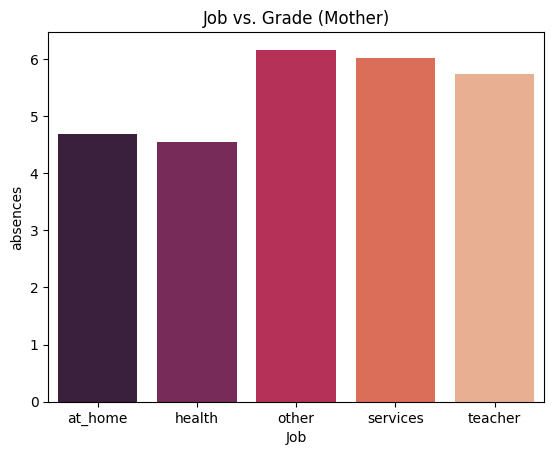

In [20]:
mjob_gr = df.groupby("Mjob").aggregate({"absences": "mean"}).reset_index()
sns.barplot(data=mjob_gr, x='Mjob', y='absences', palette='rocket').set(xlabel='Job', ylabel='absences', title='Job vs. Grade (Mother)')

In [21]:
size_gr = df.groupby("famsize").aggregate({"absences": "mean"}).reset_index()
size_gr

,famsize,absences
0,GT3,5.526690
1,LE3,6.157895



# 알고리즘 적용 (1번이어서)


  - 1-2.1 해당 데이터셋에서 학생결석 일수를 예측하는데에 적용 가능한 알고리즘 3개를 언급하고 그 중 2개를 선택하고, 그 이유를 설명하기


  - 1-2.2 해당 모델에 성능 평가 지표를 뭘로 쓸건지 그 이유를 설명하기


  - 1-2.3 선정한 2개 알고리즘으로 실제 코딩한 후 성능 평가를 통해 비교하고 설명하기 (시각화 포함)





# 모델 설명 

  - 1-3.1 실제로 사용가능한 모델인지 설명

  - 1-3.2 다양한 환경에서 적용할 수 있는 방안 설명

  - 1-3.3 추가적으로 모델 개선할 수 있는 방안 설명

# Part 2 통계분석

# 2. 회귀 계수 검정

광고비(범주형 변수, 높음과 낮음으로 적혀있음), 연구개발비(수치형 변수, 수치 적혀있음), 판매액(수치형 변수, 수치 적혀있음), 전체 관측치는 10개로 소규모 데이터. 광고비와 연구개발비가 독립변수, 판매액이 종속변수.

 - 광고비를 가변수화해서 다중선형회귀방정식을 만들고 회귀계수를 검정하기
 - 회귀 모형을 검정하기

# 3번 T검정 이표본 평균

A생산라인의 제품 평균은 5.7mm이고 표준편차는 0.03, B생산라인의 제품 평균은 5.6mm이고 표준편차는 0.04라면 5%유의수준으로 두 제품의 평균이 차이가 있는지 여부를 검정하기 (Z통계량도 제공 - Z(0.05) = 1.65, 위의 구체적인 숫자는 실제 시험 때 숫자랑 정확하게 맞지는 않음)

 - 귀무가설과 대립가설 세우기
 - 두 평균이 차이가 있는지 검정 하기 

# 4번. 베이지안 분류

바이러스 감염 분류표를 보고 베이지안 분류 방법을 사용해 양성으로 예측된 사람이 실제로 양성일 확률을 구하는 문제

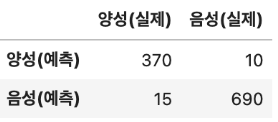

# 5번. 윌콕슨 

 - 9개 정도의 숫자 표본에 대해 단일표본 T검증을 진행하여 아래 내용을 구하기
위 표본의 평균에 대한 신뢰구간 구하기

 - 과거에 해당 표본의 모집단의 표준편차가 0.4일 때 표본 평균에 대한 신뢰구간 구하기